In [239]:
import importlib
import numpy as np

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns

import matplotlib.pyplot as plt

import gridify as gy
importlib.reload(gy)

import cluster_extraction as ce
importlib.reload(ce)



<module 'cluster_extraction' from '/Users/hj/Desktop/cluster-ambiguity/cambiguity/cluster_extraction.py'>

In [3]:
X, y = load_digits(return_X_y=True)
X_tsne = TSNE(n_components=2).fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X)

/Users/hj/opt/anaconda3/envs/camb/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/hj/opt/anaconda3/envs/camb/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:>

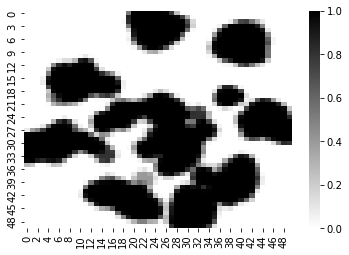

In [242]:
X_tsne_grid = gy.gridify(X_tsne, 0.2, 40, 1000, 50)
sns.heatmap(X_tsne_grid, cmap='binary')

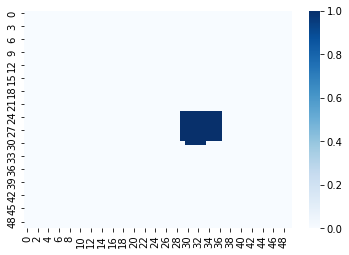

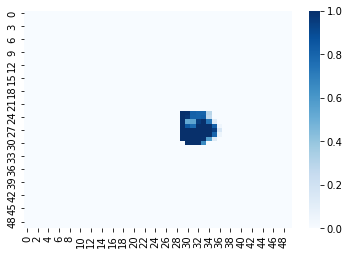

In [249]:
cluster = ce.cluster_extraction(X_tsne_grid)
sns.heatmap(cluster, cmap='Blues')
plt.show()

cluster_grid = cluster * X_tsne_grid
sns.heatmap(cluster_grid, cmap="Blues")
plt.show()

<AxesSubplot:>

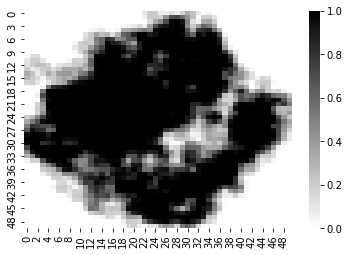

In [250]:
X_pca_grid = gy.gridify(X_pca, 0.2, 30, 1000, 50)
sns.heatmap(X_pca_grid, cmap='binary')

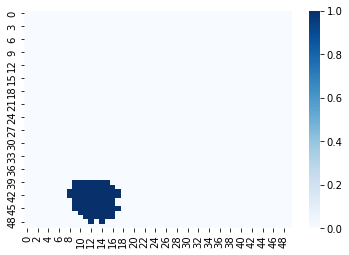

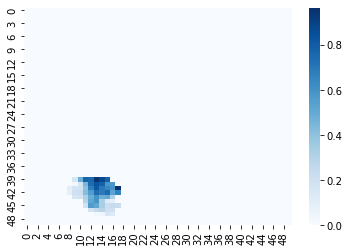

In [255]:
cluster = ce.cluster_extraction(X_pca_grid)
sns.heatmap(cluster, cmap='Blues')
plt.show()

cluster_grid = cluster * X_pca_grid
sns.heatmap(cluster_grid, cmap="Blues")
plt.show()